# Kapotte moffen met een classificatiemodel

**Inhoud:**
1. [Installeer packages and laad de data](#1)
1. [Data Exploratie](#2)
1. [Preparee de data](#3)
1. [Analyse ](#4)
1. [Splits train- en testset](#5)
1. [Train en valideer de modellen](#6)


<a id="1"></a> 


## 1. Installeer packages en laad de data

In [1]:
# a) Installeer packages
import pandas as pd       # 'as' := we korten het package af voor veel gebruik
import numpy as np
import os
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier         # Modeling CART Decision Tree
from sklearn.ensemble import RandomForestClassifier     # Modeling Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Modeling XGBoost
from sklearn import metrics                             # Performance statistieken
from sklearn.model_selection import train_test_split    # Split train-/testset
from sklearn.metrics import classification_report       # Performance rapport van classificatie model
from sklearn.metrics import f1_score,average_precision_score                    # f1 score of model
from six import StringIO                                # Nodig voor grafiek Decision Tree
from sklearn.tree import export_graphviz                # Nodig voor grafiek Decision Tree
import pydotplus                                        # Nodig voor grafiek Decision Tree
from IPython.display import Image                       # Nodig voor grafiek Decision Tree
from sklearn.tree import export_graphviz                # Nodig voor grafiek Decision Tree
import graphviz as gv                                   # Nodig voor grafiek Decision Tree


In [2]:
# b) Laad de data

inputdata = pd.read_csv("data/dataset.csv")

#    Krijg een overzicht van de data
inputdata.head(10)

,Unnamed: 0,GESTOORDASSET_TH05,GRONDZAKKING,ONTWATERINGSDIEPTE,DATUM_AANNEMEN_JAAR,DATUM_INBEDRIJF_JAAR,Age,COX1==COX2,"GRONDSOORT_Bebouwing, enz",GRONDSOORT_Leem,...,CONSTRUCTIE_COX_LOVINOL_2,CONSTRUCTIE_COX_LOVINOL_3,CONSTRUCTIE_COX_LOVINOL_4,CONSTRUCTIE_COX_LOVINOL_5,CONSTRUCTIE_COX_LOVINOL_6,CONSTRUCTIE_COX_Massamof,CONSTRUCTIE_COX_Nekaldietmof,CONSTRUCTIE_COX_Oliemof,CONSTRUCTIE_COX_Onbekend,CONSTRUCTIE_COX_Overig
0,74020,False,1,-5.0,1966.0,1966.0,52.0,True,1,0,...,0,0,0,0,0,1,0,0,0,0
1,116335,False,1,-1.5,2015.0,2015.0,3.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,182742,False,0,-1.0,1993.0,1993.0,25.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,186086,False,0,-2.0,1990.0,1990.0,28.0,False,1,0,...,0,0,0,0,0,0,0,1,0,0
4,86441,False,1,0.0,1916.0,1916.0,102.0,True,1,0,...,0,0,0,0,0,1,0,0,0,0
5,6290,False,1,-4.0,1985.0,NaN,33.0,True,1,0,...,0,0,0,1,0,0,0,0,0,0
6,10974,False,0,0.5,1973.0,NaN,45.0,False,1,0,...,0,0,0,0,0,0,0,1,0,0
7,467762,True,1,0.0,2007.0,2007.0,6.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
8,477009,True,0,0.0,2004.0,2004.0,6.0,False,1,0,...,0,0,0,0,0,0,0,0,0,0
9,127971,False,0,-1.5,2017.0,2017.0,1.0,False,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
inputdata.columns

Index(['Unnamed: 0', 'GESTOORDASSET_TH05', 'GRONDZAKKING',
       'ONTWATERINGSDIEPTE', 'DATUM_AANNEMEN_JAAR', 'DATUM_INBEDRIJF_JAAR',
       'Age', 'COX1==COX2', 'GRONDSOORT_Bebouwing, enz', 'GRONDSOORT_Leem',
       'GRONDSOORT_Lichte klei', 'GRONDSOORT_Lichte zavel',
       'GRONDSOORT_Moerig op zand', 'GRONDSOORT_Veen', 'GRONDSOORT_Water',
       'GRONDSOORT_Zand', 'GRONDSOORT_Zware klei', 'GRONDSOORT_Zware zavel',
       'KABEL_COX1_GPLK', 'KABEL_COX1_GPLK_NA_1978',
       'KABEL_COX1_GPLK_VOOR_1978', 'KABEL_COX1_Onbekend', 'KABEL_COX1_Overig',
       'KABEL_COX1_XLPE', 'KABEL_COX2_GPLK', 'KABEL_COX2_GPLK_NA_1978',
       'KABEL_COX2_GPLK_VOOR_1978', 'KABEL_COX2_Onbekend', 'KABEL_COX2_Overig',
       'KABEL_COX2_XLPE', 'CONSTRUCTIE_EXP_Gietharsmof',
       'CONSTRUCTIE_EXP_Kabeldon', 'CONSTRUCTIE_EXP_Krimpmof',
       'CONSTRUCTIE_EXP_Kunststofmof', 'CONSTRUCTIE_EXP_Lovinolmof',
       'CONSTRUCTIE_EXP_Massamof', 'CONSTRUCTIE_EXP_Nekaldietmof',
       'CONSTRUCTIE_EXP_Oliemof', 'C

<a id="2"></a> 


## 2. Data Exploratie 

In [5]:
# a) Haal een overzicht op van de data
#    Haal de hoeveelheid rijen en kolommen op
print('(nrow, ncol):', inputdata.shape)     

#    Laat een korte samenvatting van de numerieke variabelen zien
inputdata.describe()                        # min/max, count, mean, std and percentiles

(nrow, ncol): (9430, 79)


,Unnamed: 0,GRONDZAKKING,ONTWATERINGSDIEPTE,DATUM_AANNEMEN_JAAR,DATUM_INBEDRIJF_JAAR,Age,"GRONDSOORT_Bebouwing, enz",GRONDSOORT_Leem,GRONDSOORT_Lichte klei,GRONDSOORT_Lichte zavel,...,CONSTRUCTIE_COX_LOVINOL_2,CONSTRUCTIE_COX_LOVINOL_3,CONSTRUCTIE_COX_LOVINOL_4,CONSTRUCTIE_COX_LOVINOL_5,CONSTRUCTIE_COX_LOVINOL_6,CONSTRUCTIE_COX_Massamof,CONSTRUCTIE_COX_Nekaldietmof,CONSTRUCTIE_COX_Oliemof,CONSTRUCTIE_COX_Onbekend,CONSTRUCTIE_COX_Overig
count,9430.000000,9430.000000,9430.000000,9430.000000,7371.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,...,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000
mean,202436.489714,0.337964,-2.323413,1991.970626,1995.297517,24.656840,0.426723,0.001060,0.085366,0.071368,...,0.020467,0.055037,0.010604,0.057370,0.006575,0.074337,0.075610,0.193743,0.023860,0.050053
std,167996.237553,0.473041,3.553061,18.416727,17.007232,18.450564,0.494628,0.032549,0.279440,0.257452,...,0.141597,0.228065,0.102436,0.232561,0.080822,0.262333,0.264387,0.395251,0.152621,0.218066
min,0.000000,0.000000,-72.000000,1916.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75017.500000,0.000000,-2.500000,1978.000000,1983.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,146518.000000,0.000000,-2.000000,1996.000000,2000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,467006.750000,1.000000,-1.000000,2007.000000,2009.000000,37.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,485263.000000,1.000000,12.000000,2018.000000,2018.000000,102.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# b) Check het data type van iedere variabele
print(pd.DataFrame(inputdata.dtypes, columns=['Datatype']))

                             Datatype
Unnamed: 0                      int64
GESTOORDASSET_TH05               bool
GRONDZAKKING                    int64
ONTWATERINGSDIEPTE            float64
DATUM_AANNEMEN_JAAR           float64
...                               ...
CONSTRUCTIE_COX_Massamof        int64
CONSTRUCTIE_COX_Nekaldietmof    int64
CONSTRUCTIE_COX_Oliemof         int64
CONSTRUCTIE_COX_Onbekend        int64
CONSTRUCTIE_COX_Overig          int64

[79 rows x 1 columns]


In [7]:
# c) Krijg een overzicht van de NULLS in de dataset
nulls = pd.DataFrame(inputdata.isnull().sum(), columns=['# NULLS'])        # Hoeveelheid NULLS 

lst={}                                                                     # Hoeveelheid NULLS als percentage
for col in inputdata.columns:                                       
    lst[col]=np.sum(inputdata.loc[:,col].isnull())/len(inputdata.loc[:,col])
percNulls = pd.DataFrame(pd.Series(lst), columns=['% NULLS'])

print(pd.concat([nulls, percNulls], axis=1))

                              # NULLS  % NULLS
Unnamed: 0                          0      0.0
GESTOORDASSET_TH05                  0      0.0
GRONDZAKKING                        0      0.0
ONTWATERINGSDIEPTE                  0      0.0
DATUM_AANNEMEN_JAAR                 0      0.0
...                               ...      ...
CONSTRUCTIE_COX_Massamof            0      0.0
CONSTRUCTIE_COX_Nekaldietmof        0      0.0
CONSTRUCTIE_COX_Oliemof             0      0.0
CONSTRUCTIE_COX_Onbekend            0      0.0
CONSTRUCTIE_COX_Overig              0      0.0

[79 rows x 2 columns]


In [9]:
# analyseer de te voorspellen variabele
target = 'GESTOORDASSET_TH05'

inputdata[target].value_counts()

False    7076
True     2354
Name: GESTOORDASSET_TH05, dtype: int64

In [ ]:
# analyseer dummies
df_defect = inputdata[inputdata['??']==??]
df_defect.groupby('??').count()

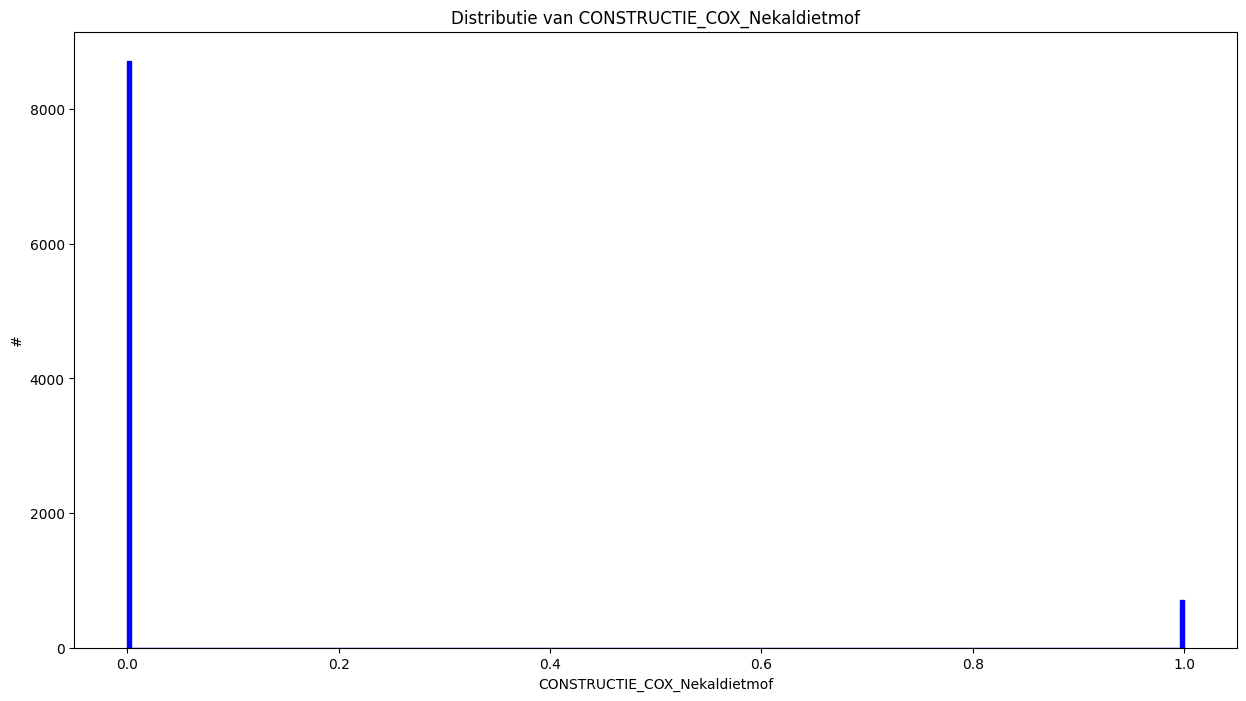

In [10]:
# f) Analyseer de distributie van continue variabelen
variable_analyzed = 'CONSTRUCTIE_COX_Nekaldietmof'

plt.figure(figsize=(15,8))
plt.hist((inputdata[variable_analyzed]), bins=250, color = 'blue', edgecolor = 'blue')
plt.title('Distributie van {}'.format(variable_analyzed))
plt.xlabel(variable_analyzed)
plt.ylabel('#')
plt.show()

In [ ]:
variable_analyzed = '??'

plt.figure(figsize=(15,8))
plt.hist((inputdata[variable_analyzed]), bins=250, color = 'blue', edgecolor = 'blue')
plt.title('Distributie van {}'.format(variable_analyzed))
plt.xlabel(variable_analyzed)
plt.ylabel('#')
plt.show()

<a id="3"></a> 


## 3. Prepareer de data

In [ ]:
print(inputdata.shape)

In [ ]:
# a) Verwijder de uitschieters (waar variabelen een onmogelijk hoge waarde hebben)



In [ ]:
# b) Verwerk missende waardes

inputdata = inputdata.fillna(inputdata.mean())

In [ ]:
# c ) Maak een dummy van de te voorspellen variabele



<a id="4"></a> 


## 4. Analyse

In [ ]:
inputdata.columns.values

In [ ]:
# a) Maak een staafdiagram om de relatie tussen de dummies en de te voorspellen variabele te onderzoeken, bekijk 
# specifieke variabelen om het aantal tabbelen overzichtelijk te houden

dummies = ['???'
          ]


plt.figure(figsize=(20,140))
for i, column in enumerate(dummies):
    plt.subplot(math.ceil(len(dummies)/2), 2, i+1)
    sns.barplot(inputdata[column], inputdata[target], palette='Blues')
plt.show()

In [ ]:
#  b) Laat een correlatie matrix zien om correlaties tussen alle variabelen te onderzoeken, bekijk
# specifieke variabelen om de matrix overzichtelijk te houden

columns = ['???'
          ]

correlation = inputdata[columns]
corrmat = correlation.corr().round(2)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdBu_r')
plt.show()


<a id="5"></a> 


## 5. Splits train- en testset

In [ ]:
# 
data_train = None

<a id="6"></a> 


## 6. Train en valideer modellen

<a id="6a"></a> 
## Decision Tree

In [ ]:
# Laat de namen van alle variabelen zien
data_train.columns.values

In [ ]:
# Definieer X en y 
X_variables = ['???']
y_variable = '???'

X_train = data_train.loc[:, X_variables]
y_train = data_train[y_variable]
X_test = data_test.loc[:, X_variables]
y_test = data_test[y_variable]

In [ ]:
# a) Kies de model parameters 
#    Note: als Min_bucket te groot is, kan de tree mogelijk niet splitsen, als het te klein is wordt de tree misschien te 
#    groot om te interpreteren
Min_num_splits = ??                            # Minimum hoeveelheid van items te splitten
Min_bucket     = ??                            # Minimum hoeveelheid van items per bucket
Max_depth      = ??                            # Maximum depth of final tree (nr of levels)

In [ ]:
# b) Estimate het model 


In [ ]:
# c) Maak voorspellingen voor de test set



#    Laat de eerste 5 rijen van de voorspelling probabilities en de overeenkomende voorspelling zien
pd.concat([pd.DataFrame(preds_proba, columns=["Prob. 0", "Prob. 1"]), pd.DataFrame(preds, columns=["Prediction"])], axis=1).head()

In [ ]:
#    Bereken het optimale cut-off punt
cost_TP = ??
cost_TN = ??
cost_FP = ??
cost_FN = ??
total_cost = math.inf

for i in np.linspace(0,1,100,endpoint=False):
    y_pred = (preds_proba[:,1]>i).astype('int')
    results = metrics.confusion_matrix(y_pred,y_test)
    TN = results[0][0]
    FN = results[0][1]
    FP = results[1][0]
    TP = results[1][1]
    
    # Bereken cutoff-punt
    cost = TN*cost_TN + TP*cost_TP + FP*cost_FP + FN*cost_FN
    total_cost = min(total_cost,cost)
    if(total_cost == cost):
        opt_cutoff = i
        
print('Optimale cut-off:', opt_cutoff)

#    Maak voorspellingen voor de test set met het optimale cut-off punt
preds = (preds_proba[:,1] > opt_cutoff).astype('int')
print(preds)

In [ ]:
#    bepaal wat de 200 moffen zijn met de grootste kans om te falen
chanceOfFailure = preds_proba[:,1]

moffenPerJaar = 200
cutOffChance = np.sort(chanceOfFailure)[::-1][moffenPerJaar]

predictions = ??

In [ ]:
#    Plot tpr vs 1-fpr
fpr, tpr, t = metrics.roc_curve(y_test, preds_proba[:,1])
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i)
                    ,'1-fpr' : pd.Series(1-fpr, index = i)
                    ,'tf' : pd.Series(tpr - (1-fpr), index = i)
                    ,'thresholds' : pd.Series(t, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('1-False Positive Rate')
ax.set_xticklabels([])
plt.show()

In [ ]:
# d) Evalueer resultaten
#    i. Maak een confusion matrix


In [ ]:
#    ii. Maak een classificatie rapport


In [ ]:
#    iii. Verkrijg de feature importances van de tree
importances = mytree.feature_importances_ 
std = np.std([mytree.feature_importances_], axis=0)
indices = np.argsort(importances)[::-1]

importances_features = []
print("Feature ranking:")                    # Print the feature ranking
for f in range(X_train.shape[1]):
    print("Feature %d (%s) %f" % (indices[f], X_variables[indices[f]], importances[indices[f]]))
    importances_features.append(X_variables[indices[f]])

plt.figure(figsize=(7.5,5))
plt.figure()                                 # Plot the feature importances 
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.title("Feature importances")
plt.ylabel("Importance in terms of decreasing the weighted impurity")
plt.xlabel("Feature")
plt.xticks(range(X_train.shape[1]), importances_features, rotation = 30)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
#    iv. Maak de ROC curve
fpr, tpr, t = metrics.roc_curve(y_test, preds_proba[:,1])

#     v. Bereken AUC
CART_roc_auc_tree = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')      # Plot results
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='Mean ROC Decision Tree CART (AUC = %0.2f)' % (CART_roc_auc_tree))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# e) Visualizeer de Decision Tree
dot_data = StringIO()
export_graphviz(mytree, out_file=dot_data,           # mytree := name of your decision treee
                filled=True, rounded=True,
                feature_names=X_variables,
                special_characters=True)
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<a id="6b"></a> 
## Random Forest 

In [ ]:
# Definieer de train en test set

X_train = data_train.loc[:, X_variables]
y_train = data_train[y_variable]
X_test = data_test.loc[:, X_variables]
y_test = data_test[y_variable]

In [ ]:
# a) Kies de model parameters 
#     Note: Je kan de grootte van je forest aanpassen met N_trees, maar let er op dat de berekeningsduur dan toeneemt
#     Note: Als Min_bucket te groot is, splitsen de trees misschien niet
N_trees        = ??                           # Hoeveelheid estimated trees
Min_num_splits = ??                            # Minimum hoeveelheid van te splitten items    
Min_bucket     = ??  # Minimum hoeveelheid van items per bucket
Max_depth      = ??                            # Maximum depth van iedere tree (hoeveelheid levels)

In [ ]:
# b) Estimate het model



In [ ]:
# c) Maak voorspellingen voor de test set



#    Laat de eerste 5 rijen van de voorspelling probabilities en de overeenkomende voorspelling zien


In [ ]:
#    bepaal wat de 200 moffen zijn met de grootste kans om te falen



In [ ]:
# d) Evaluaeer resultaten
#    i. Maak een confusion matrix


In [ ]:
#    ii. Maak een classificatie rapport



In [ ]:
#    iii. Verkrijg de feature importances van de tree
importances = forest.feature_importances_ 
std = np.std([forest.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

importances_features = []
print("Feature ranking:")                    # Print the feature ranking
for f in range(X_train.shape[1]):
    print("Feature %d (%s) %f" % (indices[f], X_variables[indices[f]], importances[indices[f]]))
    importances_features.append(X_variables[indices[f]])

plt.figure(figsize=(7.5,5))
plt.figure()                                 # Plot the feature importances 
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.title("Feature importances")
plt.ylabel("Importance in terms of decreasing the weighted impurity")
plt.xlabel("Feature")
plt.xticks(range(X_train.shape[1]), importances_features, rotation = 30)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
#    iv. Maak de ROC curve


#     v. Bereken de AUC


plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')      # Plot results
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='Mean ROC Decision Tree RF (AUC = %0.2f)' % (RF_roc_auc_tree))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

<a id="6v"></a> 
## XGBoost

In [ ]:
# Definieer X and y 
X_variables = ['???'             # ADJUST VARIABLES TO THOSE YOU WISH TO INCLUDE
                ]
y_variable = '??'

X_train = data_train.loc[:, X_variables]
y_train = data_train[y_variable]
X_test = data_test.loc[:, X_variables]
y_test = data_test[y_variable]

print(X_variables)

In [ ]:
# a) Kies de model parameters 
N_trees        = ??                         # Hoeveelheid estimated trees
Max_depth      = ??                             # Maximum depth van iedere tree (hoeveelheid levels)
Learning_rate  = ??                             # The learning rate ('eta')
Min_bucket     = ??                           # Minimum hoeveelheid van items per bucket
Subsample      = ??                          # Subsample ratio van de training instance
Verbose        = ??                             # Of er tijdens het boosten berichten geprint moeten worden


In [ ]:
# b) Estimate model


In [ ]:
# c) Maak voorspellingen voor de test set

#    Laat de eerste 5 rijen van de voorspelling probabilities en de overeenkomende voorspelling zien



In [ ]:
#    bepaal wat de 200 moffen zijn met de grootste kans om te falen
chanceOfFailure = preds_proba[:,1]

moffenPerJaar = 200
cutOffChance = np.sort(chanceOfFailure)[::-1][moffenPerJaar]

predictions = np.array([if chance > cutOffChance for chance in chanceOfFailure])

index_values = np.where(predictions == True)
print(index_values)

In [ ]:
# d) Evalueer de resultaten
#    i. Maak een confusion matrix
print(pd.crosstab(preds, y_test))

In [ ]:
#    ii. Maak een classificatie rapport
print(classification_report(y_test, preds))
f1_XGB = f1_score(y_test, preds)

In [ ]:
#    iii. Krijg de feature importances van het XGBoost model
importances = XGB.feature_importances_ 
std = np.std([XGB.feature_importances_], axis=0)
indices = np.argsort(importances)[::-1]

importances_features = []
print("Feature ranking:")                    # Print the feature ranking
for f in range(X_train.shape[1]):
    print("Feature %d (%s) %f" % (indices[f], X_variables[indices[f]], importances[indices[f]]))
    importances_features.append(X_variables[indices[f]])

if False:
    plt.figure(figsize=(7.5,5))
    plt.figure()                                 # Plot the feature importances 
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.title("Feature importances")
    plt.ylabel("Importance in terms of decreasing the weighted impurity")
    plt.xlabel("Feature")
    plt.xticks(range(X_train.shape[1]), importances_features, rotation = 30)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

In [ ]:
# Maak de ROC curve


# Bereken AUC


plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')      # Plot results
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='Mean ROC Decision Tree XGBoost (AUC = %0.2f)' % (XGB_roc_auc_tree))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Vergelijk de modellen